Perceptron is a single layer neural network. It is used as a binary classifier. The figure below shows the architecture of a perceptron.

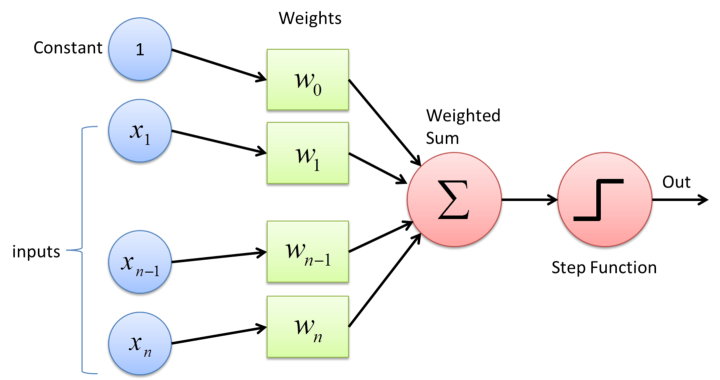

Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.
A multi-layer perceptron has one input layer and for each input, there is one neuron(or node), it has one output layer with a single node for each output and it can have any number of hidden layers and each hidden layer can have any number of nodes. A schematic diagram of a Multi-Layer Perceptron (MLP) is depicted below.

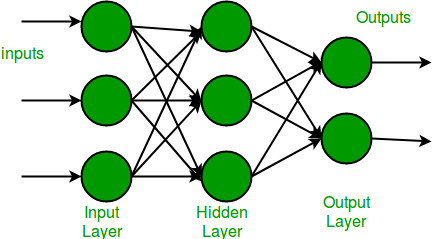

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np

**Formation of the dataset**

In [ ]:
x_a = np.random.rand(100, 1)+0.1
x_b = -1*np.random.rand(100, 1)-0.1
x_c = -1*np.random.rand(100, 1)-0.1
x_d = np.random.rand(100, 1)+0.1
y_a = np.random.rand(100, 1)+0.1
y_b = np.random.rand(100, 1)+0.1
y_c = -1*np.random.rand(100, 1)-0.1
y_d = -1*np.random.rand(100, 1)-0.1
y_1 = np.ones((100, 1))
y_2 = 0*np.ones((100, 1))
y_3 = np.ones((100, 1))
y_4 = 0*np.ones((100, 1))

Making the binary classes

In [ ]:
x1 = np.concatenate((x_a, x_b, x_c, x_d))
x2 = np.concatenate((y_a, y_b, y_c, y_d))
t = np.concatenate((y_1, y_2, y_3, y_4))

In [ ]:
import matplotlib.pyplot as plt

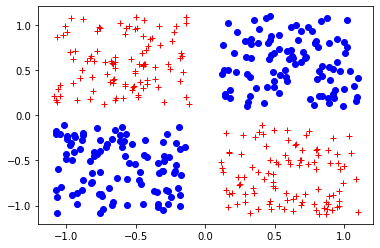

In [ ]:
plt.plot(x_a, y_a, 'bo')
plt.plot(x_b, y_b, 'r+')
plt.plot(x_c, y_c, 'bo')
plt.plot(x_d, y_d, 'r+')

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(np.c_[x1, x2, t], columns=['x1', 'x2', 'y'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'])
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

# Model with 1 hidden layer with 5 neurons

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(units=5, activation="sigmoid"),
    keras.layers.Dense(units=1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=1000)

Plotting the predictions on a contour plot

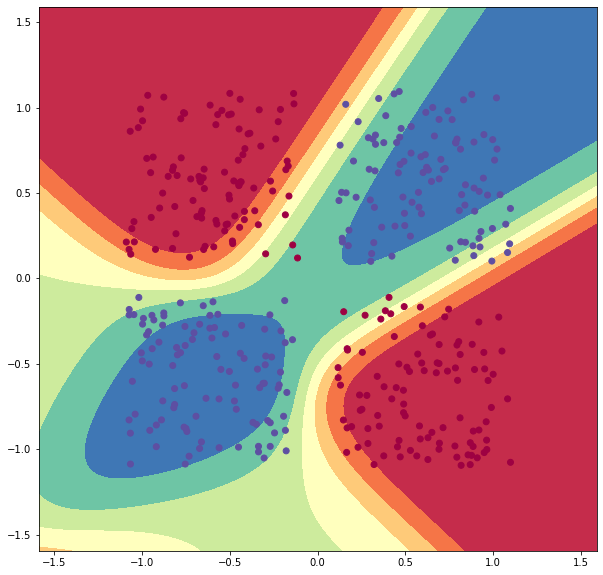

In [ ]:
X = np.c_[x1, x2]
y = t
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Model with 1 hidden layer with 500 neurons

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(units=500, activation="sigmoid"),
    keras.layers.Dense(units=1, activation="sigmoid"),
])
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(X_train, y_train, epochs=1000)

Plotting predictions on a contour plot

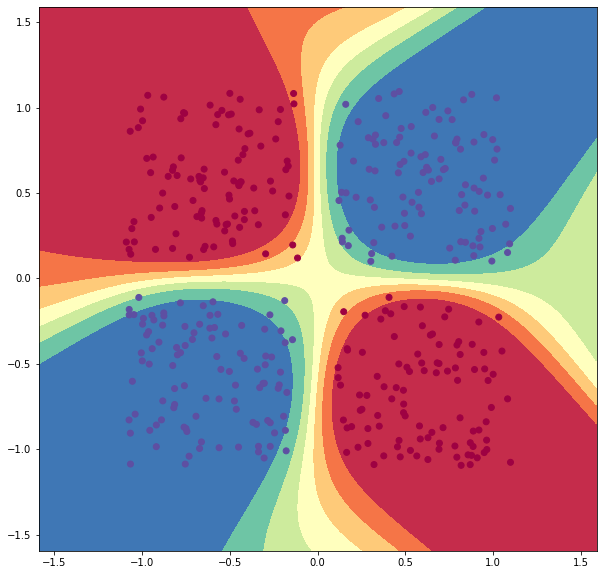

In [ ]:
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Model with 2 hidden layers with 5 neurons in both



In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(units=5, activation="sigmoid"),
    keras.layers.Dense(units=5, activation="sigmoid"),
    keras.layers.Dense(units=1, activation="sigmoid"),
])
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(X_train, y_train, epochs=2000)

Plotting the predictions on a contour plot

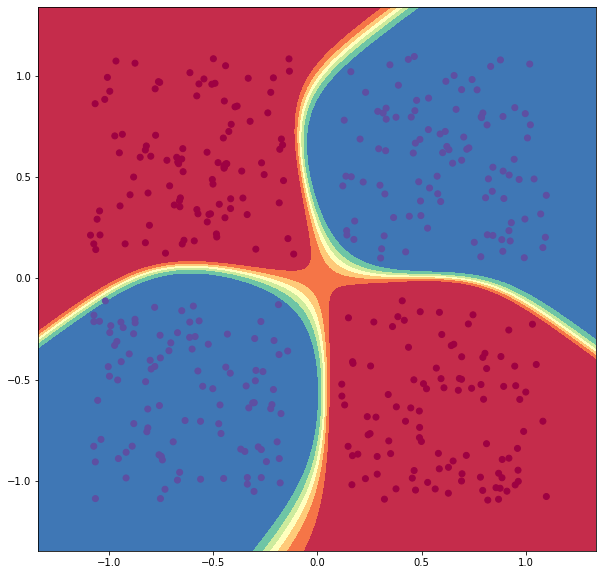

In [ ]:
X = np.c_[x1, x2]
y = t
x_min, x_max = X[:, 0].min() - .25, X[:, 0].max() + .25
y_min, y_max = X[:, 1].min() - .25, X[:, 1].max() + .25
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Conclusion


*   In the first model with hidden layer and 5 neurons, we see kind of a parabolic decision boundary. There are some misclassification on the edges of the decision boundary. This is because the model is too simple for the problem.
*   In the second model, we see that the decision boundary seperates the classes more correctly, but there is still some fuzzy edges in the plot. The model is better than the previous one as it has more neuron units which provide more detail to the model.
* In the third model, the decision boundary is sharp and there is a clear distinction between the two classes. The parabolic characteristics of the boundaries in the previous models is not present. The increase in number of hidden layers causes more abstraction in the higher layers, as lower layers model low level or basic features and gives them as output to the higher layers.

